In [1]:
import sys
sys.path.append(r'C:\Users\Duy Nguyen\Downloads\UCBerkleyML-AI-TryIts\module 10\module') # for window
sys.path.append('/Users/ihduynguyen/Downloads/module 10/module') # for mac


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from timeseries_decomposer import TimeSeriesDecomposer
from timeseries_forecaster import TimeSeriesForecaster
from data_describer import DataDescriber
from decomposition_based_forecaster import DecompositionBasedForecaster

In [3]:
# acc_death_us = pd.read_csv('/Users/ihduynguyen/Downloads/module 10/data/accidental-deaths-in-usa-monthly.csv')
acc_death_us = pd.read_csv(r'C:\Users\Duy Nguyen\Downloads\UCBerkleyML-AI-TryIts\module 10\data\accidental-deaths-in-usa-monthly.csv')


In [7]:
# Assuming 'data' is your pandas DataFrame
acc_death_us.rename(columns={'Accidental deaths in USA: monthly, 1973 ? 1978': 'Accidents'}, inplace=True)

# Verify the change
print(acc_death_us.columns)


Index(['Month', 'Accidents'], dtype='object')


In [5]:
from data_describer import DataDescriber
from decomposition_based_forecaster import DecompositionBasedForecaster

acc_death_us['Month'] = pd.to_datetime(acc_death_us['Month'])
acc_death_us.set_index('Month', inplace=True)

data_describer = DataDescriber(acc_death_us)
data_description = data_describer.describe()
data_describer.print_description()

Data Description:
Start date: 1973-01-01
End date: 1978-12-01
Number of points: 72
Frequency: MS

Summary_stats:
          Accidents
count     72.000000
mean    8787.736111
std      958.338013
min     6892.000000
25%     8089.000000
50%     8728.500000
75%     9323.250000
max    11317.000000



### Forecast + Describe Forecast + Plot Residual and Analysis

#### seasonal_decompose + additive

In [8]:
acc_decomposer = TimeSeriesDecomposer(
    df=acc_death_us,
    date_col='Month',
    data_col='Accidents',
    freq='M',
    model='additive',
    period=12,
    decomposition_method='seasonal_decompose'
    )

acc_decomposer.decompose()
acc_decomposer.plot_decompositions()

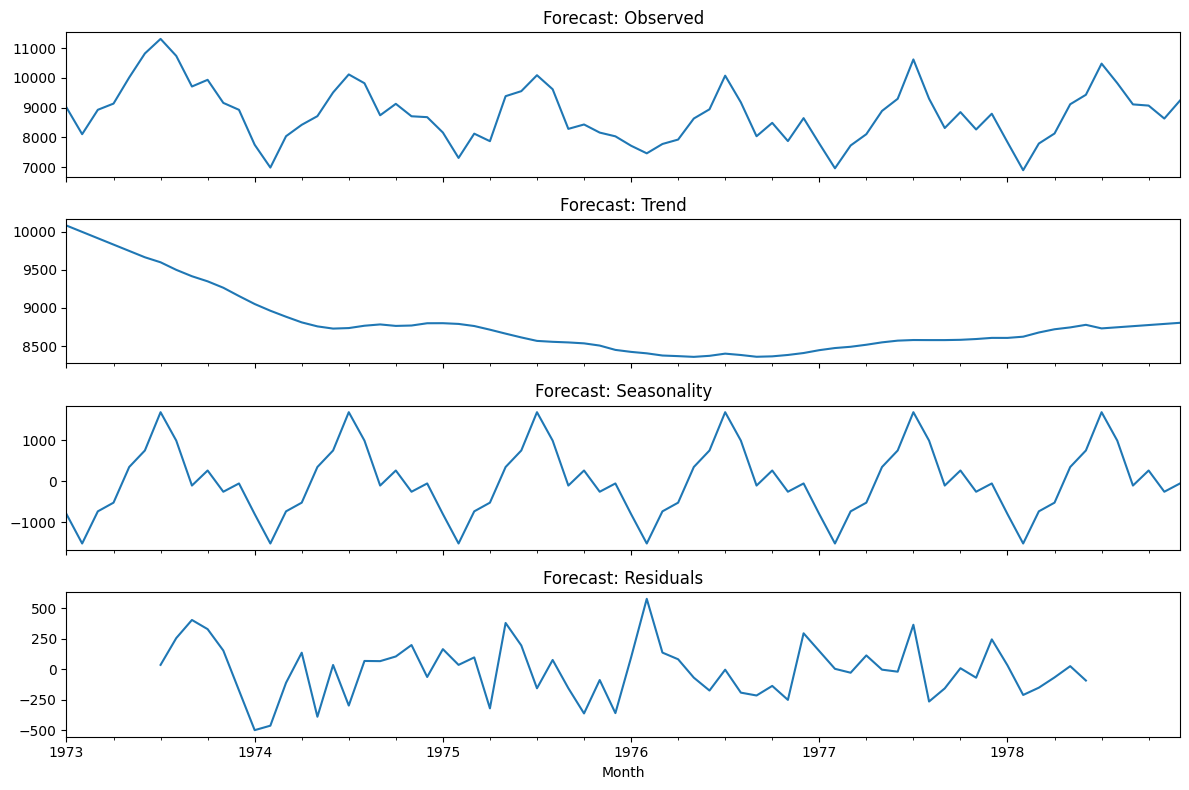

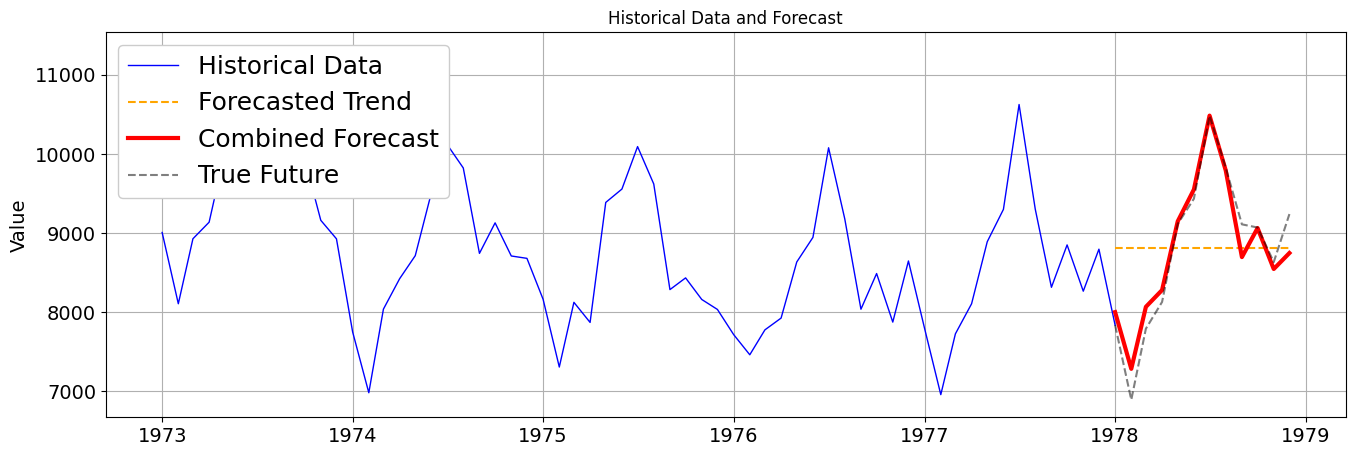

Forecast Description:
Projected period start: 1978-01-01
Projected period end: 1978-12-01
Model type: additive
Uncertainty and Model Evaluation:
Mean residual: -7.946144133649568
Std residual: 255.12195059603533


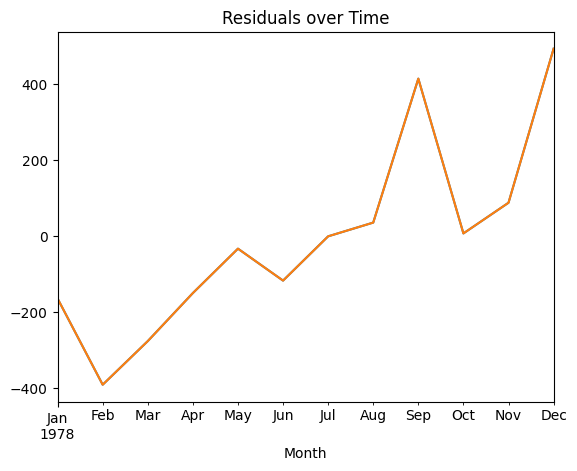

In [9]:
acc_forecaster = TimeSeriesForecaster(decomposer=acc_decomposer, train_end_date='1978-01', forecast_periods=12)
acc_forecaster.forecast_and_plot('Forecast: ')

#### seasonal_decompose + multiplicative

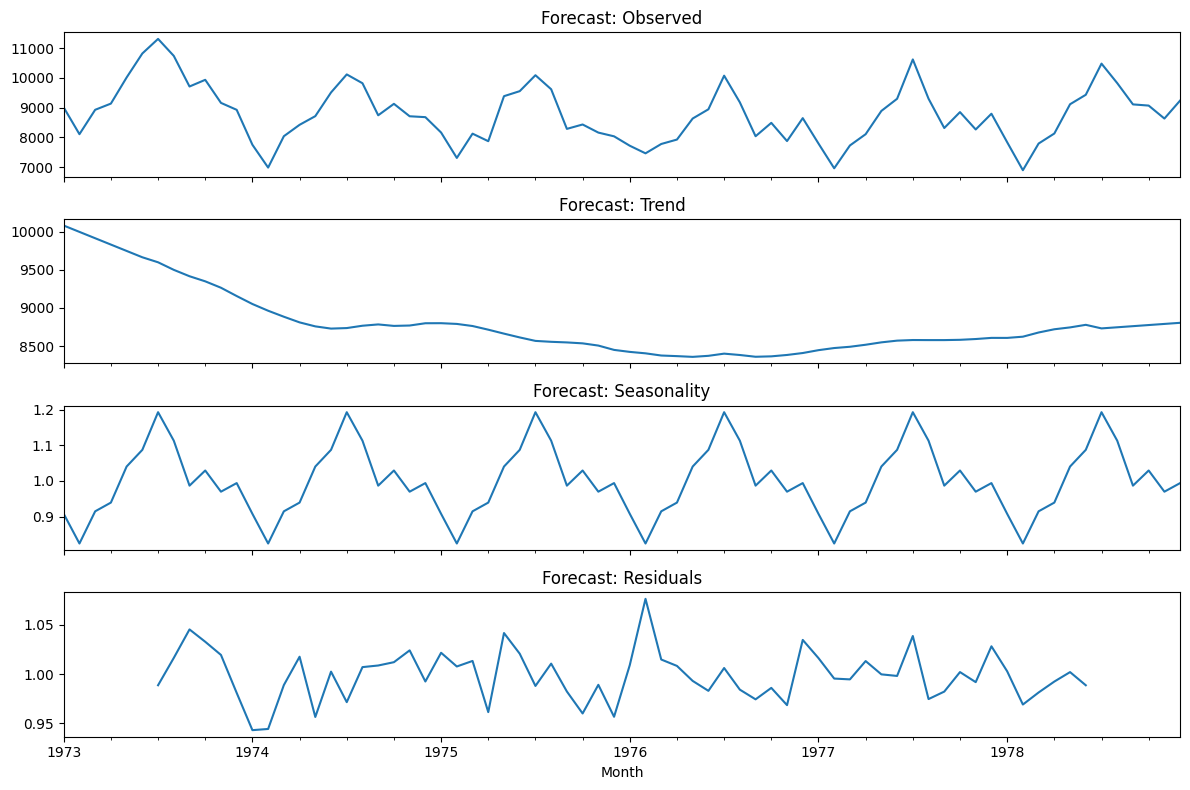

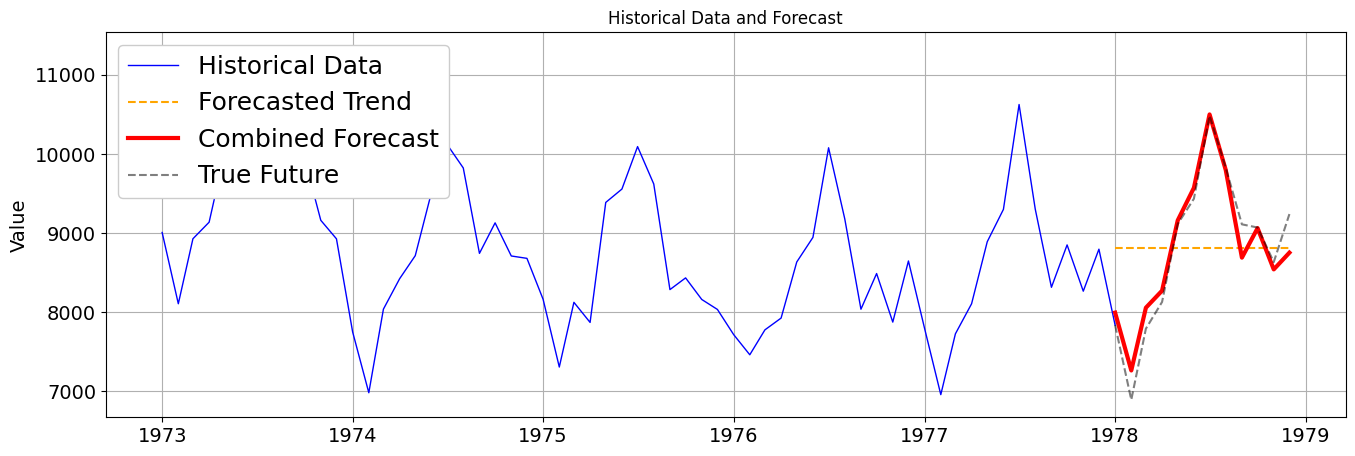

Forecast Description:
Projected period start: 1978-01-01
Projected period end: 1978-12-01
Model type: multiplicative
Uncertainty and Model Evaluation:
Mean residual: -7.946144133647825
Std residual: 251.94805184216793


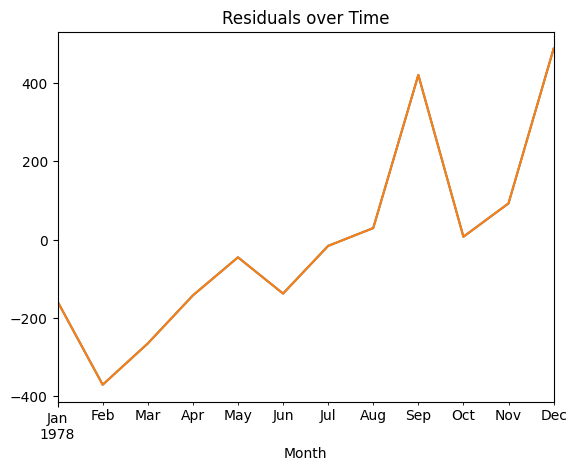

In [26]:
acc_decomposer = TimeSeriesDecomposer(
    df=acc_death_us,
    date_col='Month',
    data_col='Accidents',
    freq='M',
    model='multiplicative',
    period=12,
    decomposition_method='seasonal_decompose'
    )

acc_decomposer.decompose()

acc_forecaster = TimeSeriesForecaster(decomposer=acc_decomposer, train_end_date='1978-01', forecast_periods=12)
acc_forecaster.forecast_and_plot('Forecast: ')

#### STL + multiplicative

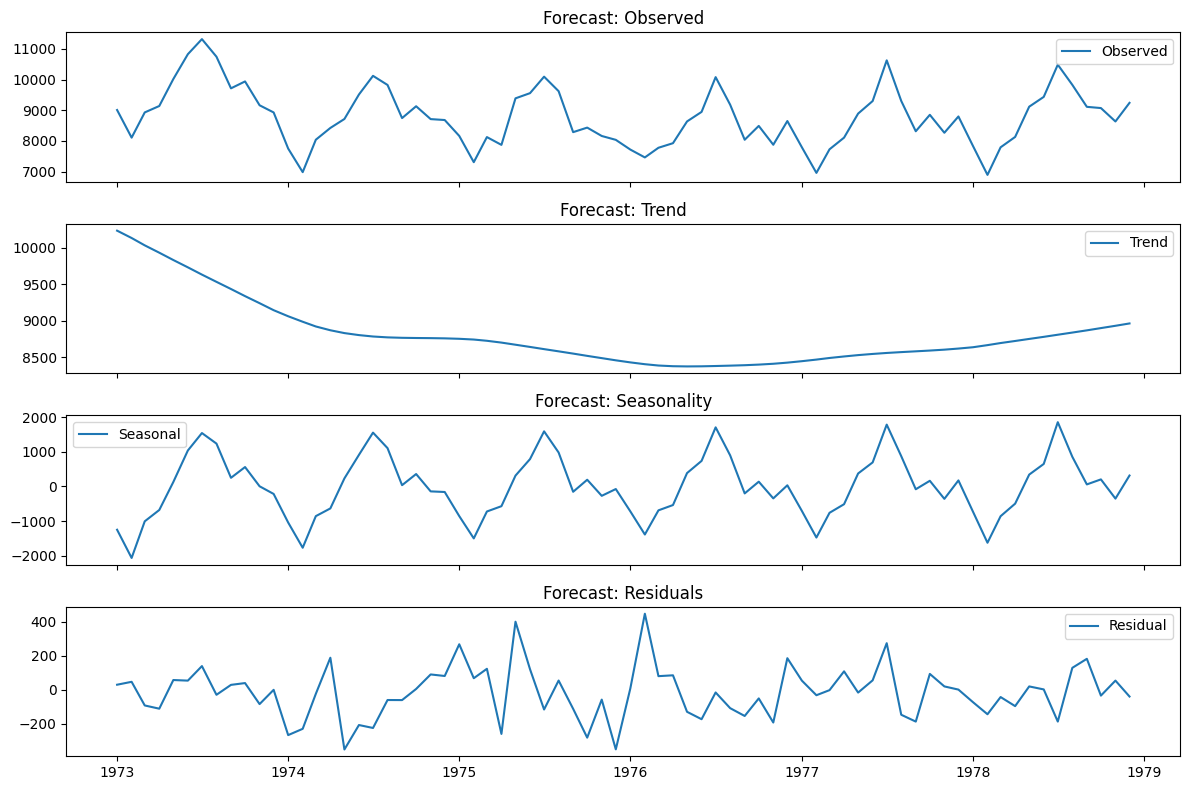

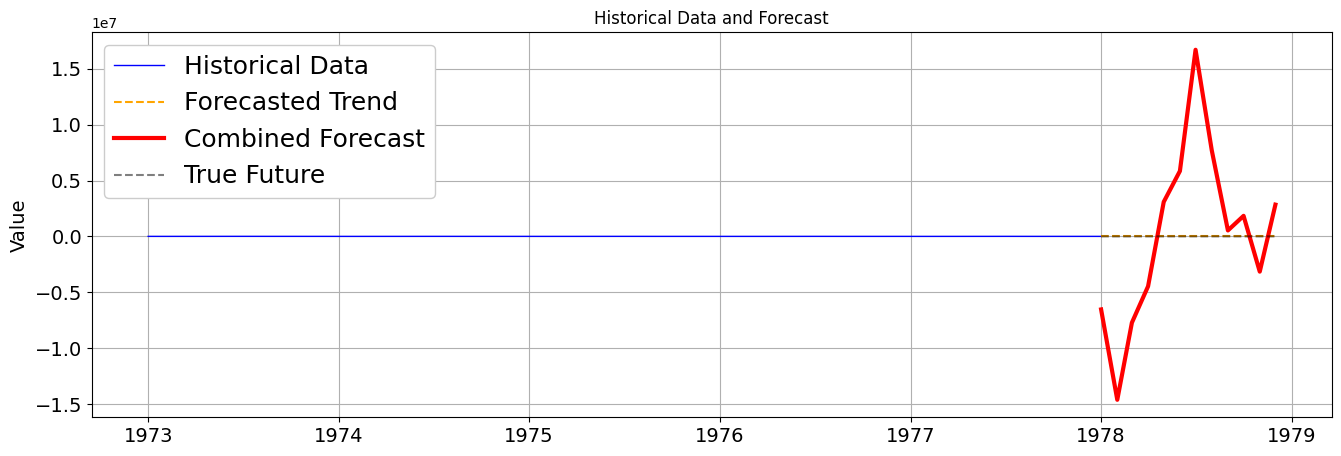

Forecast Description:
Projected period start: 1978-01-01
Projected period end: 1978-12-01
Model type: multiplicative
Uncertainty and Model Evaluation:
Mean residual: -169715.20608106384
Std residual: 8193591.553116824


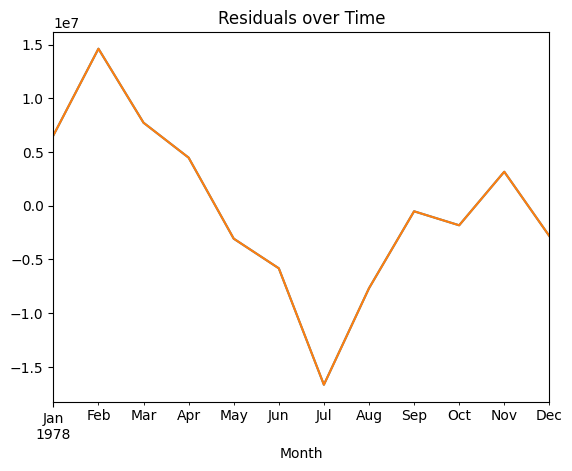

In [29]:
acc_decomposer = TimeSeriesDecomposer(
    df=acc_death_us,
    date_col='Month',
    data_col='Accidents',
    freq='M',
    model='multiplicative',
    period=12,
    decomposition_method='STL'
    )

acc_decomposer.decompose()

acc_forecaster = TimeSeriesForecaster(decomposer=acc_decomposer, train_end_date='1978-01', forecast_periods=12)
acc_forecaster.forecast_and_plot('Forecast: ')

#### STL + additive

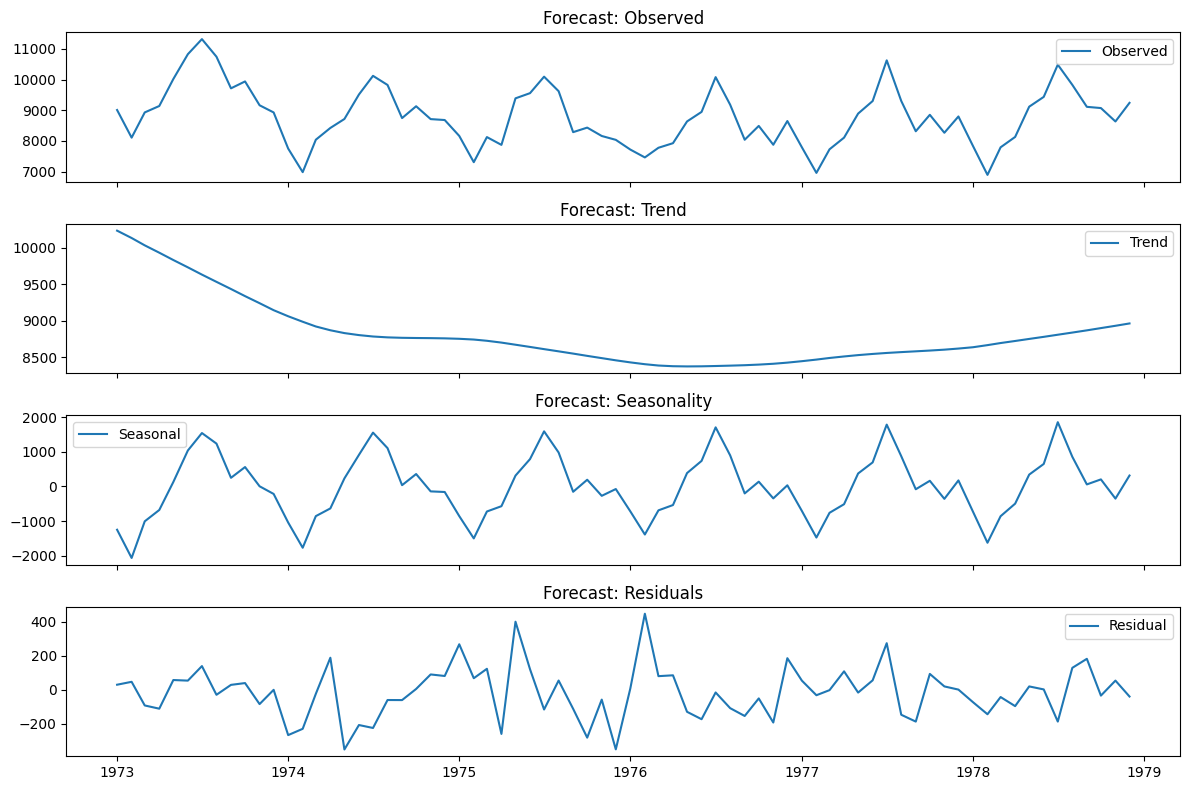

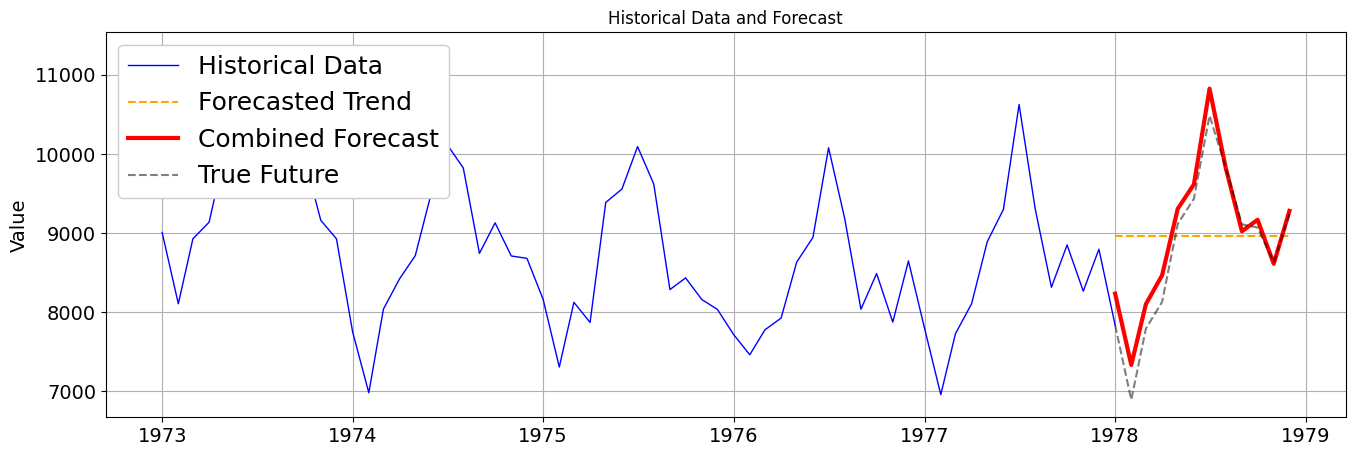

Forecast Description:
Projected period start: 1978-01-01
Projected period end: 1978-12-01
Model type: additive
Uncertainty and Model Evaluation:
Mean residual: -185.2737914389132
Std residual: 179.67790085679167


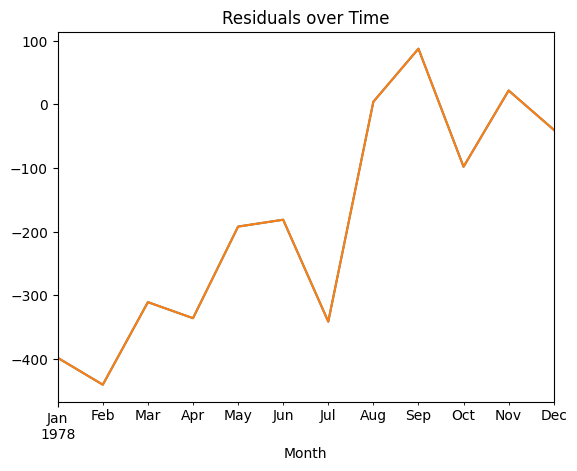

In [33]:
acc_decomposer = TimeSeriesDecomposer(
    df=acc_death_us,
    date_col='Month',
    data_col='Accidents',
    freq='M',
    model='additive',
    period=12,
    decomposition_method='STL'
    )

acc_decomposer.decompose()

acc_forecaster = TimeSeriesForecaster(decomposer=acc_decomposer, train_end_date='1978-01', forecast_periods=12)
acc_forecaster.forecast_and_plot('Forecast: ')